#### About the Data

<b>Ticket :</b> Ticket number assigned to each complaint<br>
<b>Customer Complaint:</b>  Description of complaint<br>
<b>Date:</b>  Date of complaint<br>
<b>Time:</b> Time of complaint<br>
<b>Received Via:</b>  Mode of communication of the complaint<br>
<b>City:</b> Customer city<br>
<b>State:</b> Customer state<br>
<b>Zipcode:</b> Customer zip<br>
<b>Status:</b> Status of complaint<br>




#### Problem Statements
```
* Provide the trend chart for the number of complaints at monthly and daily granularity levels

* Provide a table with the frequency of complaint types.
* Create a new categorical variable with value as Open and Closed.Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
* Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
    - Which state has the maximum complaints
    - Which state has the highest percentage of unresolved complaints
        * Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.
```

#### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
date_fields = [['Date', 'Time']]


#### Importing data from the Local Library

In [2]:
df=pd.read_csv('E:\Study Materials\Python\Project\Comcast_telecom_complaints_data\Comcast.csv',parse_dates=date_fields,dayfirst=True)

In [3]:
df.head()

,Date_Time,Ticket #,Customer Complaint,Date_month_year,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-Apr-15,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-Aug-15,Internet,Acworth,Georgia,30102,Closed,No
2,2015-04-18 09:55:47,242732,Speed and Service,18-Apr-15,Internet,Acworth,Georgia,30101,Closed,Yes
3,2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-Jul-15,Internet,Acworth,Georgia,30101,Open,Yes
4,2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-May-15,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
df.sample(5)

,Date_Time,Ticket #,Customer Complaint,Date_month_year,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
2159,2015-06-24 12:21:14,361630,Egregious Fees,24-Jun-15,Customer Care Call,West Monroe,Louisiana,71291,Solved,No
1392,2015-06-22 11:41:30,355447,Comcast- not responsive to multiple requests f...,22-Jun-15,Customer Care Call,Nashville,Tennessee,37221,Solved,No
612,2015-04-24 19:20:07,256312,Comcast poor service or throttling,24-Apr-15,Customer Care Call,Dubois,Pennsylvania,15801,Closed,No
925,2015-05-19 10:14:11,296536,Comcast billing,19-May-15,Internet,Indianapolis,Indiana,46260,Solved,Yes
333,2015-05-20 17:47:50,300124,Comcast internet,20-May-15,Internet,Canton,Georgia,30114,Closed,No


In [5]:
df.shape

(2224, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date_Time                    2224 non-null   datetime64[ns]
 1   Ticket #                     2224 non-null   object        
 2   Customer Complaint           2224 non-null   object        
 3   Date_month_year              2224 non-null   object        
 4   Received Via                 2224 non-null   object        
 5   City                         2224 non-null   object        
 6   State                        2224 non-null   object        
 7   Zip code                     2224 non-null   int64         
 8   Status                       2224 non-null   object        
 9   Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 173.9+ KB


In [7]:
df.isna().sum()

Date_Time                      0
Ticket #                       0
Customer Complaint             0
Date_month_year                0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [8]:
df.duplicated().sum()

0

#### EDA 

In [9]:
df['Month']=df['Date_Time'].dt.month

In [10]:
df['Month']

0       4
1       8
2       4
3       7
4       5
       ..
2219    2
2220    2
2221    9
2222    6
2223    6
Name: Month, Length: 2224, dtype: int64

In [11]:
df['Day']=df['Date_Time'].dt.day

In [12]:
df['Day']

0       22
1        4
2       18
3        5
4       26
        ..
2219     4
2220     6
2221     6
2222    23
2223    24
Name: Day, Length: 2224, dtype: int64

In [13]:
df['Customer Complaint'].value_counts()

Comcast                                          83
Comcast Internet                                 18
Comcast Data Cap                                 17
comcast                                          13
Comcast Billing                                  11
                                                 ..
Improper Billing and non resolution of issues     1
Deceptive trade                                   1
intermittent internet                             1
Internet Speed on Wireless Connection             1
Comcast, Ypsilanti MI Internet Speed              1
Name: Customer Complaint, Length: 1841, dtype: int64

In [14]:
df['Customer Complaint']=df['Customer Complaint'].str.upper().str.capitalize()

In [15]:
df['Customer Complaint']

0                           Comcast cable internet speeds
1            Payment disappear - service got disconnected
2                                       Speed and service
3       Comcast imposed a new usage cap of 300gb that ...
4              Comcast not working and no service to boot
                              ...                        
2219                                 Service availability
2220           Comcast monthly billing for returned modem
2221                              Complaint about comcast
2222               Extremely unsatisfied comcast customer
2223                 Comcast, ypsilanti mi internet speed
Name: Customer Complaint, Length: 2224, dtype: object

#### Number of Complaints in Monthly Granuality 

In [16]:
df['Month'].value_counts().sort_index(ascending=True)

1       55
2       59
3       45
4      375
5      317
6     1046
7       49
8       67
9       55
10      53
11      38
12      65
Name: Month, dtype: int64

In [17]:
df['Day'].value_counts().sort_index(ascending=True)

4     206
5     131
6     272
13     68
14     54
15     58
16     65
17     60
18     69
19     50
20     51
21     41
22     66
23    225
24    249
25    126
26     90
27     81
28     79
29     87
30     86
31     10
Name: Day, dtype: int64

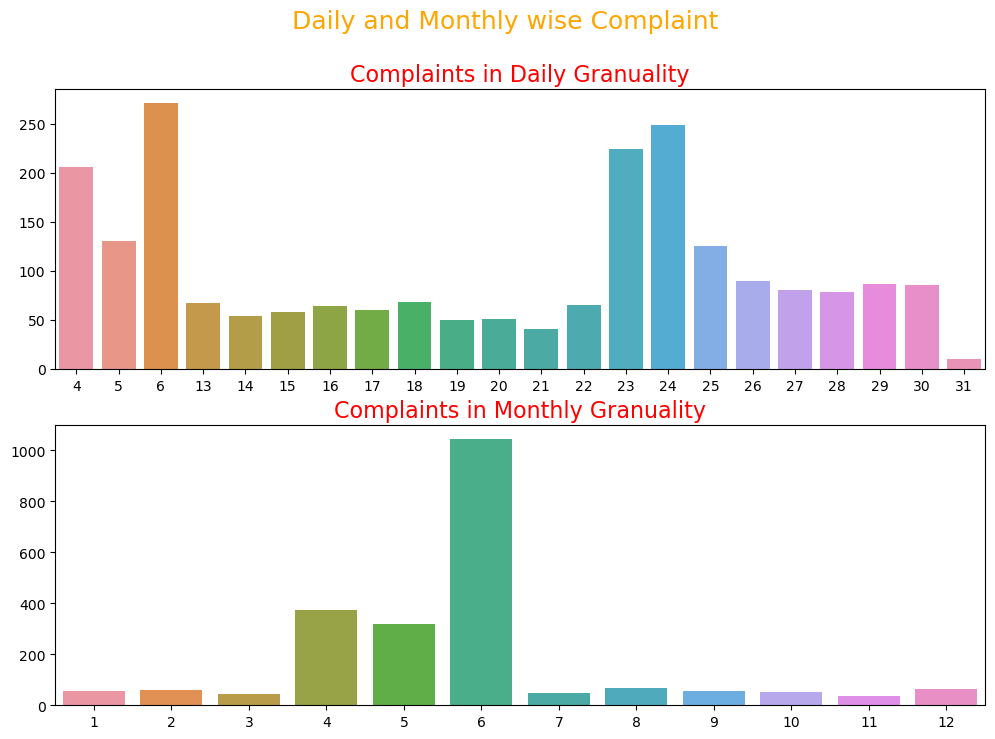

In [18]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,2)
sns.barplot(x=df['Month'].value_counts().sort_index(ascending=True).index,y=df['Month'].value_counts().sort_index(ascending=True).values)
plt.title('Complaints in Monthly Granuality',fontsize=16,color="Red")

plt.subplot(2,1,1)
sns.barplot(x=df['Day'].value_counts().sort_index(ascending=True).index,y=df['Day'].value_counts().sort_index(ascending=True).values)
plt.title('Complaints in Daily Granuality',fontsize=16,color='Red')
plt.suptitle('Daily and Monthly wise Complaint',fontsize=18,color='Orange')
plt.show()

In [19]:
# Frequency of Complaint types 

In [20]:
df["Customer Complaint"].value_counts()

Comcast                                                            102
Comcast data cap                                                    30
Comcast internet                                                    29
Comcast data caps                                                   21
Comcast billing                                                     18
                                                                  ... 
Monthly data caps                                                    1
Comcast/xfinity poor service, fraudulent billing and collection      1
Lost emails/billing                                                  1
Improper billing and non resolution of issues                        1
Comcast, ypsilanti mi internet speed                                 1
Name: Customer Complaint, Length: 1740, dtype: int64

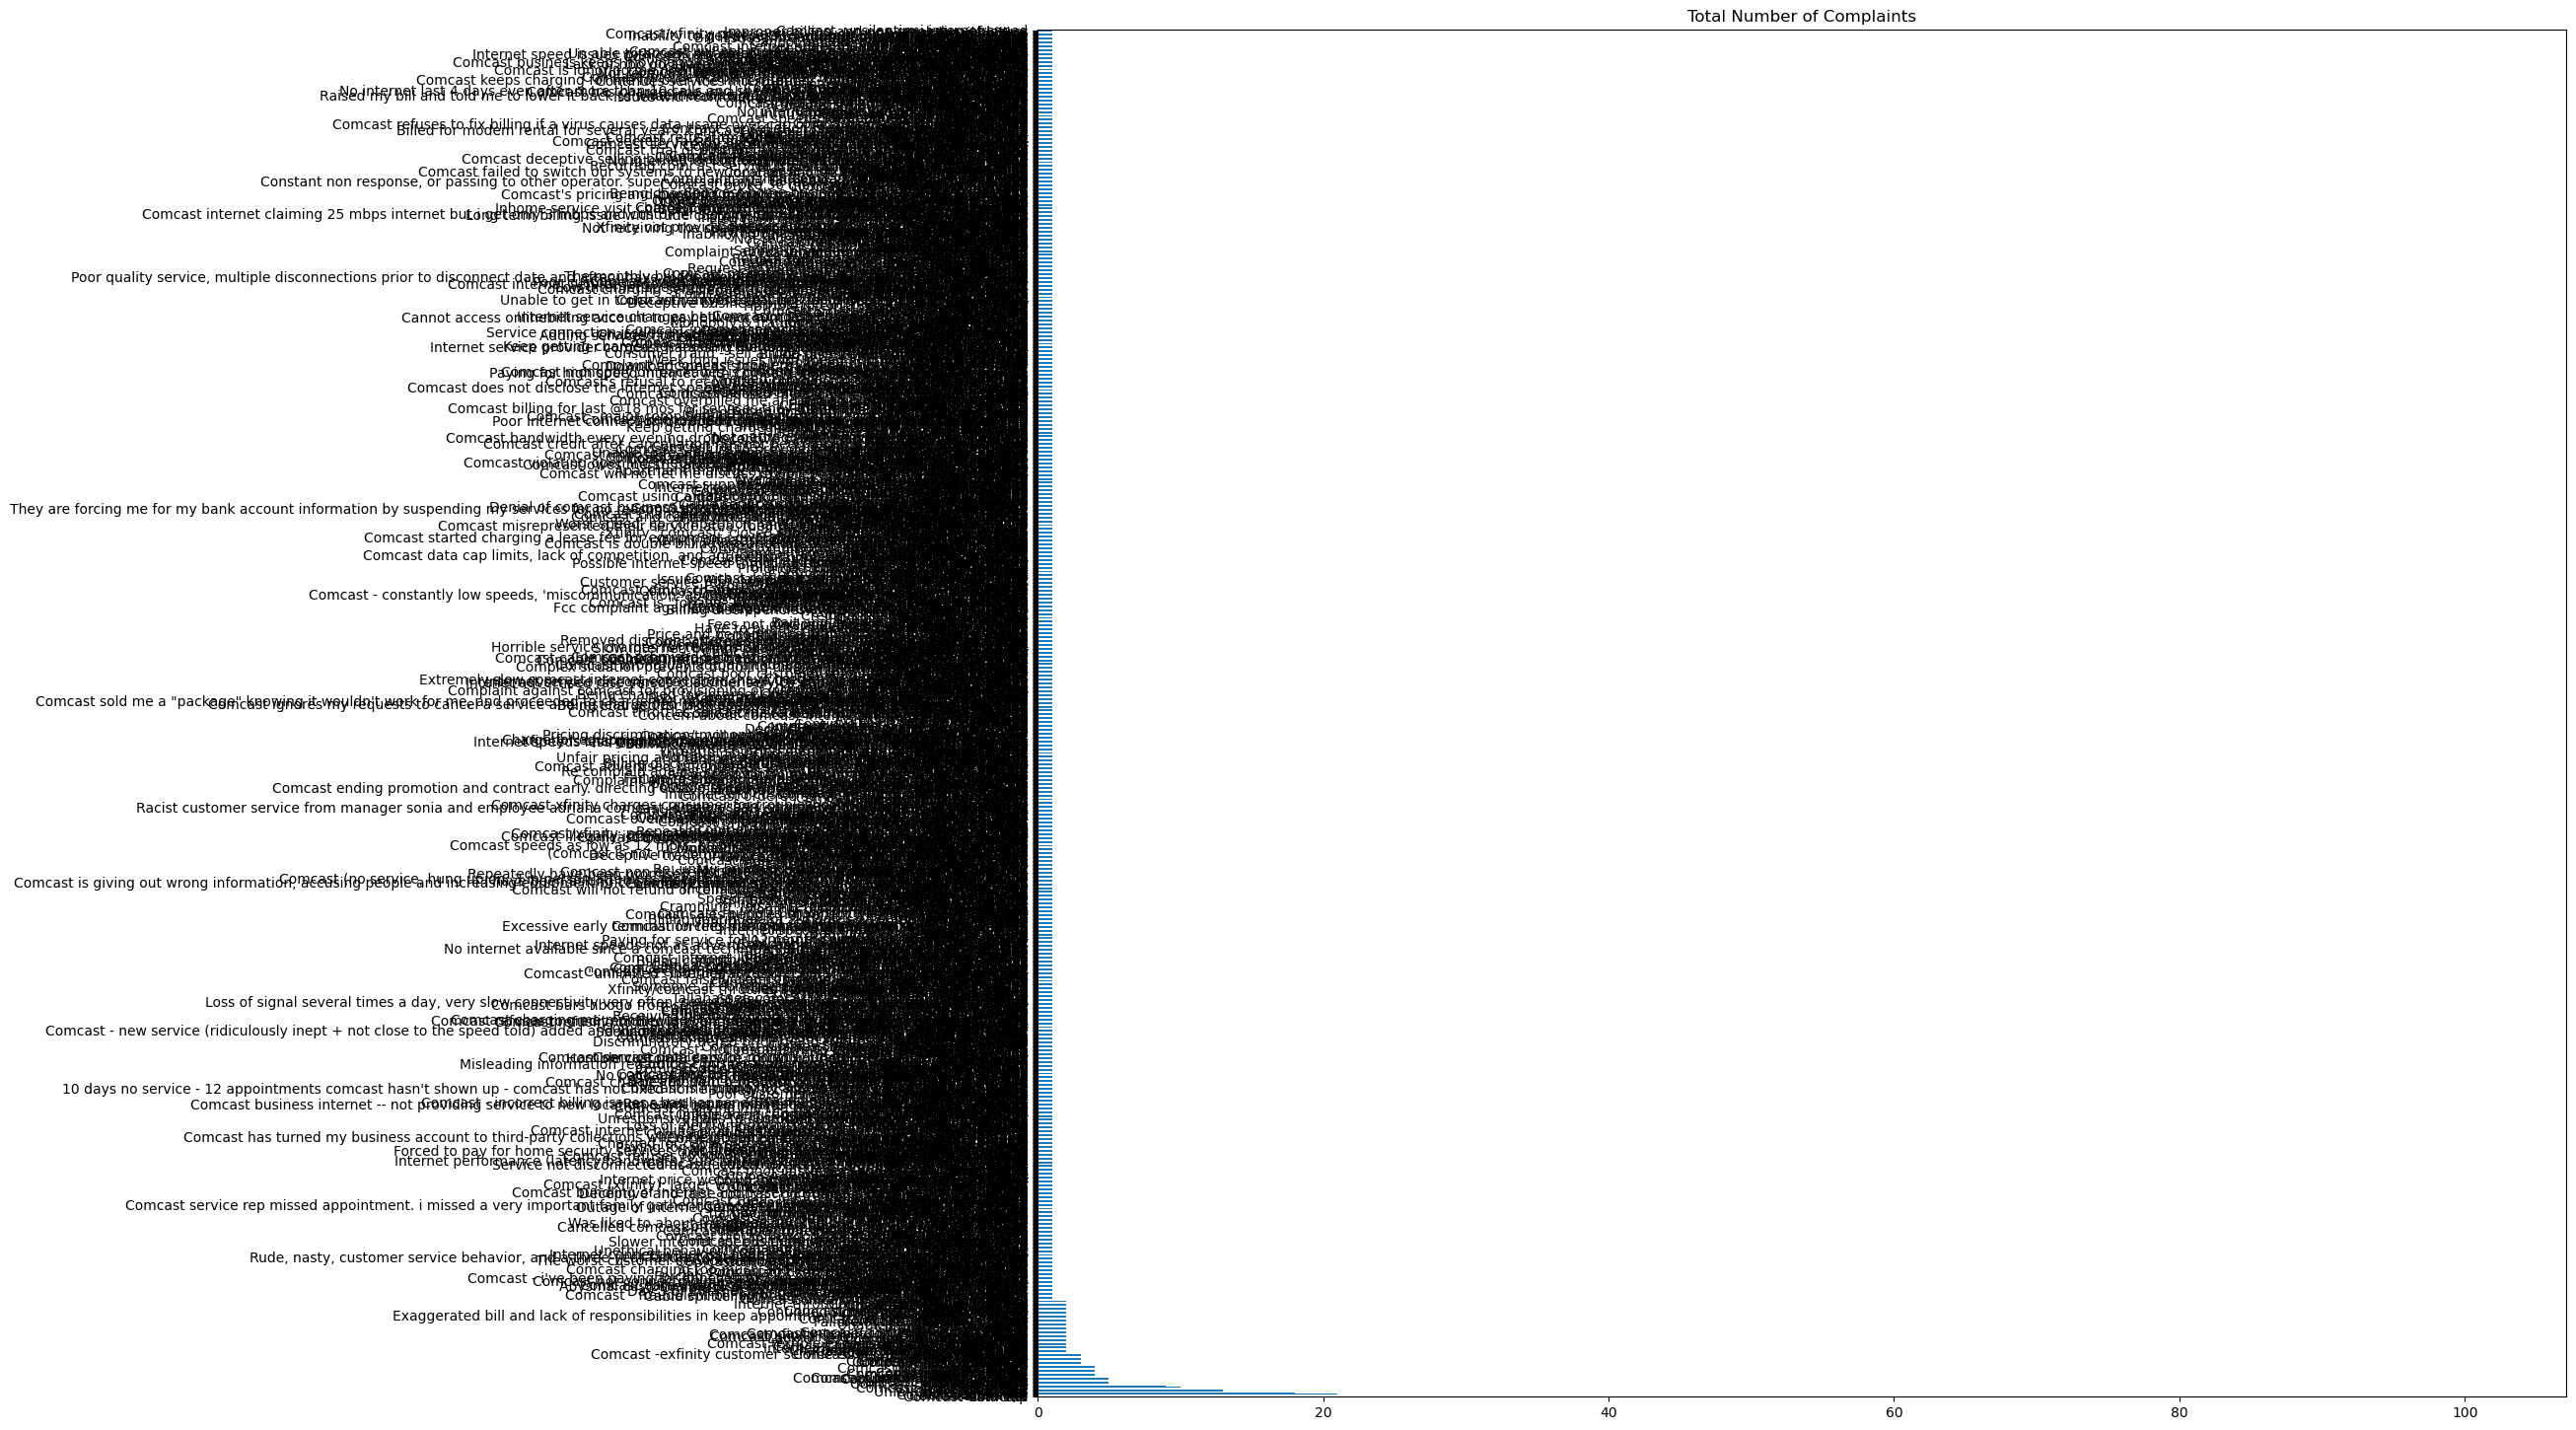

In [21]:
df["Customer Complaint"].value_counts().plot(kind='barh',figsize=(20,18))
plt.title('Total Number of Complaints')
plt.show()

#### As we plotted all the complaints the graph is not distinguished hence ploting top 25 complaints 

In [22]:
x=df['Customer Complaint'].value_counts().sort_values(ascending=False).head(25).index
y=df['Customer Complaint'].value_counts().sort_values(ascending=False).head(25).values

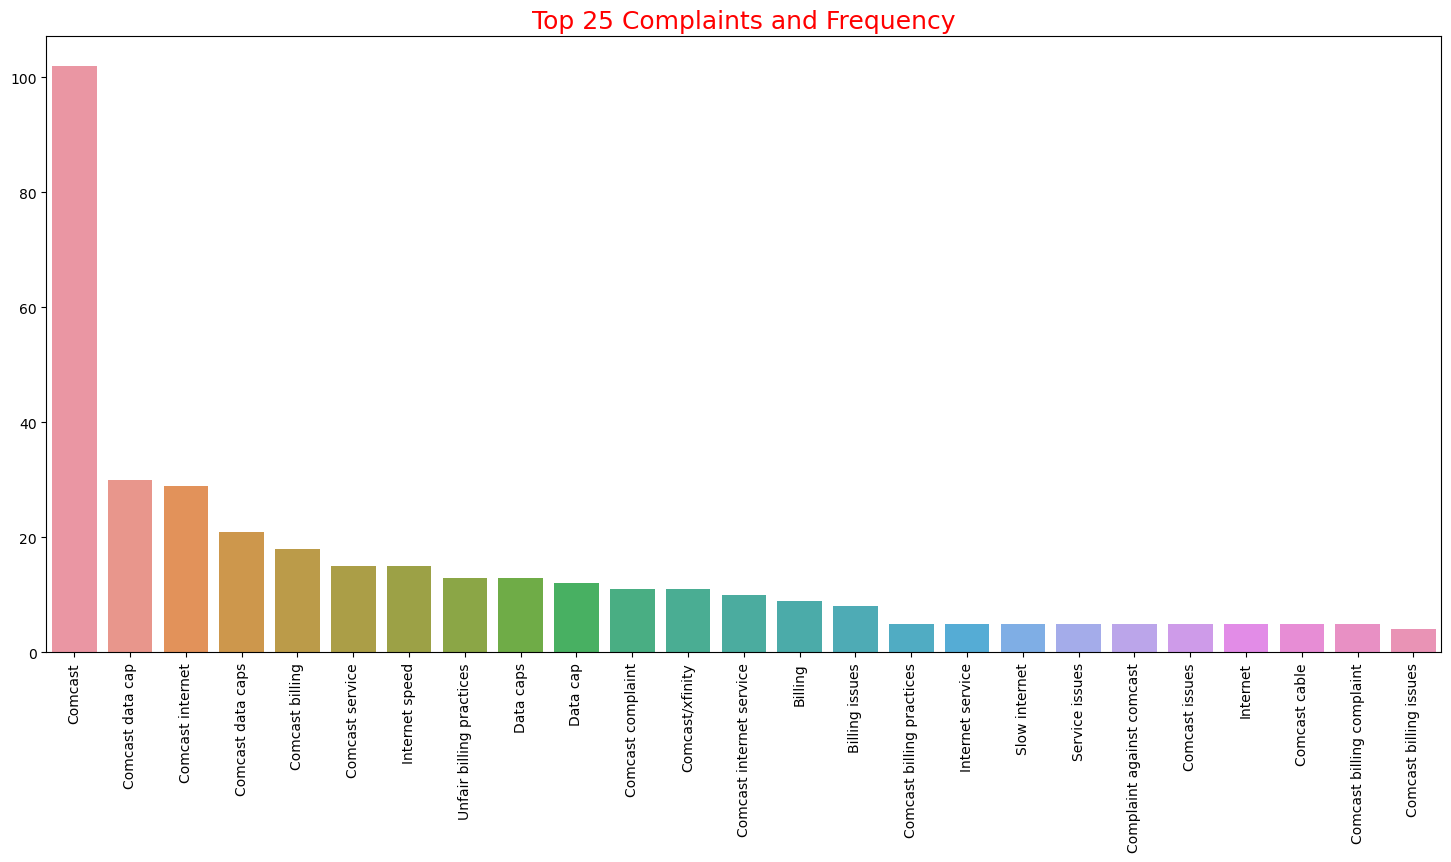

In [23]:
plt.figure(figsize=(18,8))
sns.barplot(x=x,y=y)
plt.title('Top 25 Complaints and Frequency',fontsize=18,color='Red')
plt.xticks(rotation=90)
plt.show()

In [24]:
df['Status'].value_counts()

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

In [25]:
New_Status=[]
for i in df['Status']:
    if i=='Pending' or i== 'Open':
        i='Open'
        New_Status.append(i)
    else:
        i='Closed'
        New_Status.append(i)
        
    

In [26]:
df['New Status']=New_Status

In [27]:
df[['Status','New Status']].value_counts()

Status   New Status
Solved   Closed        973
Closed   Closed        734
Open     Open          363
Pending  Open          154
dtype: int64

In [28]:
# Status wise complaint

In [29]:
df['New Status'].value_counts()

Closed    1707
Open       517
Name: New Status, dtype: int64

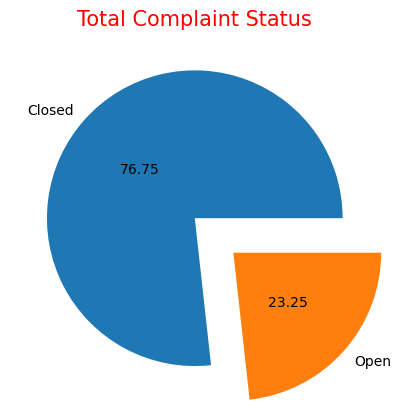

In [30]:
plt.pie(df['New Status'].value_counts(),labels=['Closed','Open'],autopct='%.2f',pctdistance=0.5,explode=(0,0.35))
plt.title('Total Complaint Status',color='Red',fontsize=15)
plt.show()

In [31]:
df.columns

Index(['Date_Time', 'Ticket #', 'Customer Complaint', 'Date_month_year',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone', 'Month', 'Day', 'New Status'],
      dtype='object')

#### Complaint wise top States 

In [52]:
df['State'].value_counts(ascending=False)

Georgia                 288
Florida                 240
California              220
Illinois                164
Tennessee               143
Pennsylvania            130
Michigan                115
Washington               98
Colorado                 80
Maryland                 78
New Jersey               75
Texas                    71
Massachusetts            61
Virginia                 60
Indiana                  59
Oregon                   49
Mississippi              39
Minnesota                33
Alabama                  26
Utah                     22
Arizona                  20
South Carolina           18
District Of Columbia     16
New Mexico               15
Louisiana                13
Delaware                 12
New Hampshire            12
Connecticut              12
West Virginia            11
Kentucky                  7
New York                  6
Arkansas                  6
Maine                     5
Missouri                  4
Ohio                      3
Vermont             

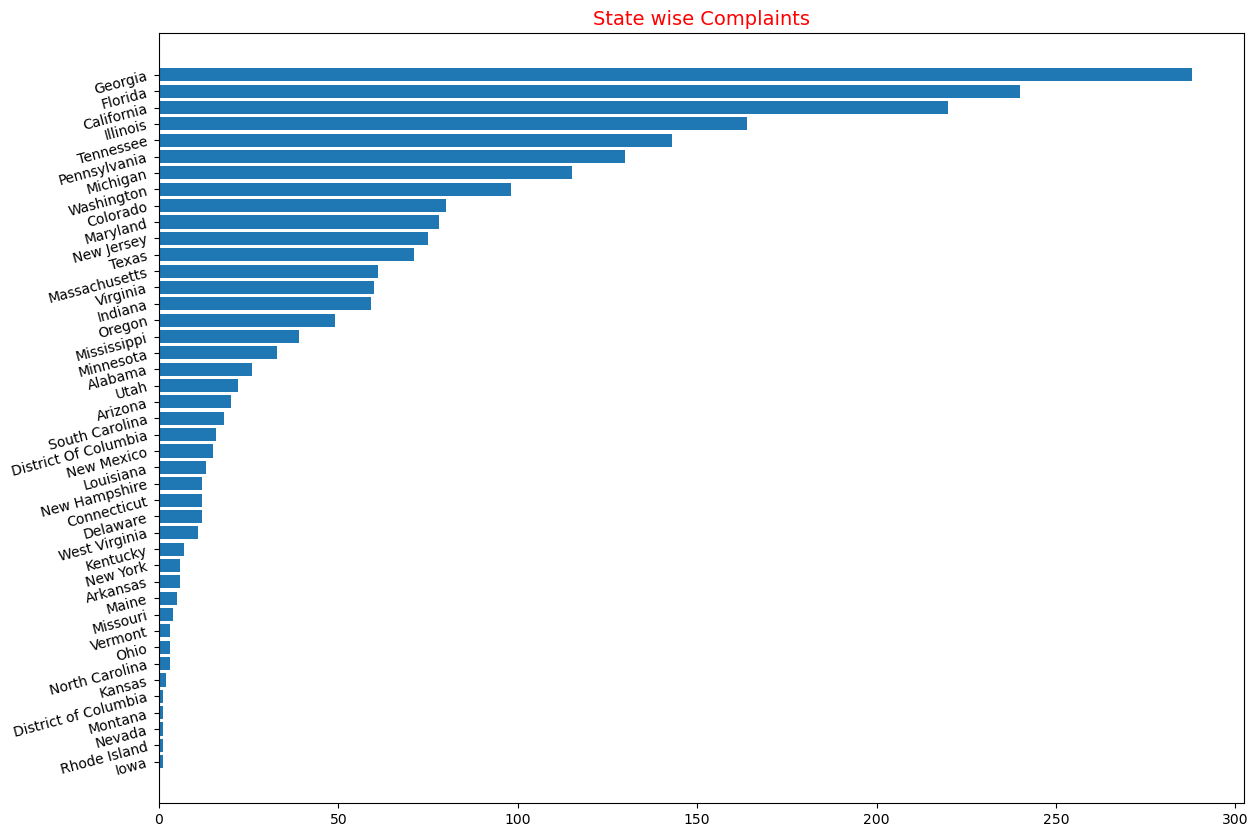

In [33]:
plt.figure(figsize=(14,10))
plt.barh(y=df['State'].value_counts(ascending=True).index,width=df['State'].value_counts(ascending=True).values)
plt.yticks(rotation=15)
plt.title('State wise Complaints',color='Red',fontsize=14)
plt.show()

#### The State "Georgia" Has maximum Complaints

In [34]:
df

,Date_Time,Ticket #,Customer Complaint,Date_month_year,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Day,New Status
0,2015-04-22 15:53:50,250635,Comcast cable internet speeds,22-Apr-15,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22,Closed
1,2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-Aug-15,Internet,Acworth,Georgia,30102,Closed,No,8,4,Closed
2,2015-04-18 09:55:47,242732,Speed and service,18-Apr-15,Internet,Acworth,Georgia,30101,Closed,Yes,4,18,Closed
3,2015-07-05 11:59:35,277946,Comcast imposed a new usage cap of 300gb that ...,05-Jul-15,Internet,Acworth,Georgia,30101,Open,Yes,7,5,Open
4,2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-May-15,Internet,Acworth,Georgia,30101,Solved,No,5,26,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,2015-02-04 09:13:18,213550,Service availability,04-Feb-15,Customer Care Call,Youngstown,Florida,32466,Closed,No,2,4,Closed
2220,2015-02-06 13:24:39,318775,Comcast monthly billing for returned modem,06-Feb-15,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2,6,Closed
2221,2015-09-06 17:28:41,331188,Complaint about comcast,06-Sep-15,Internet,Ypsilanti,Michigan,48197,Solved,No,9,6,Closed
2222,2015-06-23 23:13:30,360489,Extremely unsatisfied comcast customer,23-Jun-15,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,6,23,Closed


In [35]:
total_complaint=df['Customer Complaint'].value_counts().sum()

In [36]:
total_complaint

2224

In [37]:
Complaints_Status=pd.crosstab(index=df['State'],columns=df['New Status'])

In [38]:
Complaints_Status

New Status,Closed,Open
State,,
Alabama,17,9
Arizona,14,6
Arkansas,6,0
California,159,61
Colorado,58,22
Connecticut,9,3
Delaware,8,4
District Of Columbia,14,2
District of Columbia,1,0


In [39]:
Complaints_Status['Total']= Complaints_Status['Closed']+Complaints_Status['Open']

In [40]:
Complaints_Status

New Status,Closed,Open,Total
State,,,
Alabama,17,9,26
Arizona,14,6,20
Arkansas,6,0,6
California,159,61,220
Colorado,58,22,80
Connecticut,9,3,12
Delaware,8,4,12
District Of Columbia,14,2,16
District of Columbia,1,0,1


In [41]:
Complaints_Status['Open Percentage']=Complaints_Status['Open']/Complaints_Status['Total']*100
Complaints_Status['Closed Percentage']=Complaints_Status['Closed']/Complaints_Status['Total']*100

In [42]:
State_wise_status=Complaints_Status.sort_values(by='Open Percentage',ascending=False)

In [43]:
State_wise_status=State_wise_status.reset_index()

In [44]:
State_wise_status

New Status,State,Closed,Open,Total,Open Percentage,Closed Percentage
0,Kansas,1,1,2,50.000000,50.000000
1,Kentucky,4,3,7,42.857143,57.142857
2,Mississippi,23,16,39,41.025641,58.974359
3,Maine,3,2,5,40.000000,60.000000
4,Alabama,17,9,26,34.615385,65.384615
5,Vermont,2,1,3,33.333333,66.666667
6,Delaware,8,4,12,33.333333,66.666667
7,New Hampshire,8,4,12,33.333333,66.666667
8,Tennessee,96,47,143,32.867133,67.132867
9,Texas,49,22,71,30.985915,69.014085


In [58]:
x=State_wise_status['State']

In [46]:
y=State_wise_status['Open Percentage'].values

In [47]:
z=State_wise_status['Closed Percentage'].values

In [60]:
State_wise_status['State']

0                   Kansas
1                 Kentucky
2              Mississippi
3                    Maine
4                  Alabama
5                  Vermont
6                 Delaware
7            New Hampshire
8                Tennessee
9                    Texas
10                 Arizona
11                 Georgia
12              California
13                Colorado
14                    Utah
15           West Virginia
16              New Mexico
17                  Oregon
18              New Jersey
19                Missouri
20             Connecticut
21              Washington
22                Michigan
23                Maryland
24                Virginia
25           Massachusetts
26                Illinois
27          South Carolina
28                 Florida
29            Pennsylvania
30                 Indiana
31    District Of Columbia
32               Minnesota
33               Louisiana
34            Rhode Island
35                    Ohio
36    District of Columbia
3

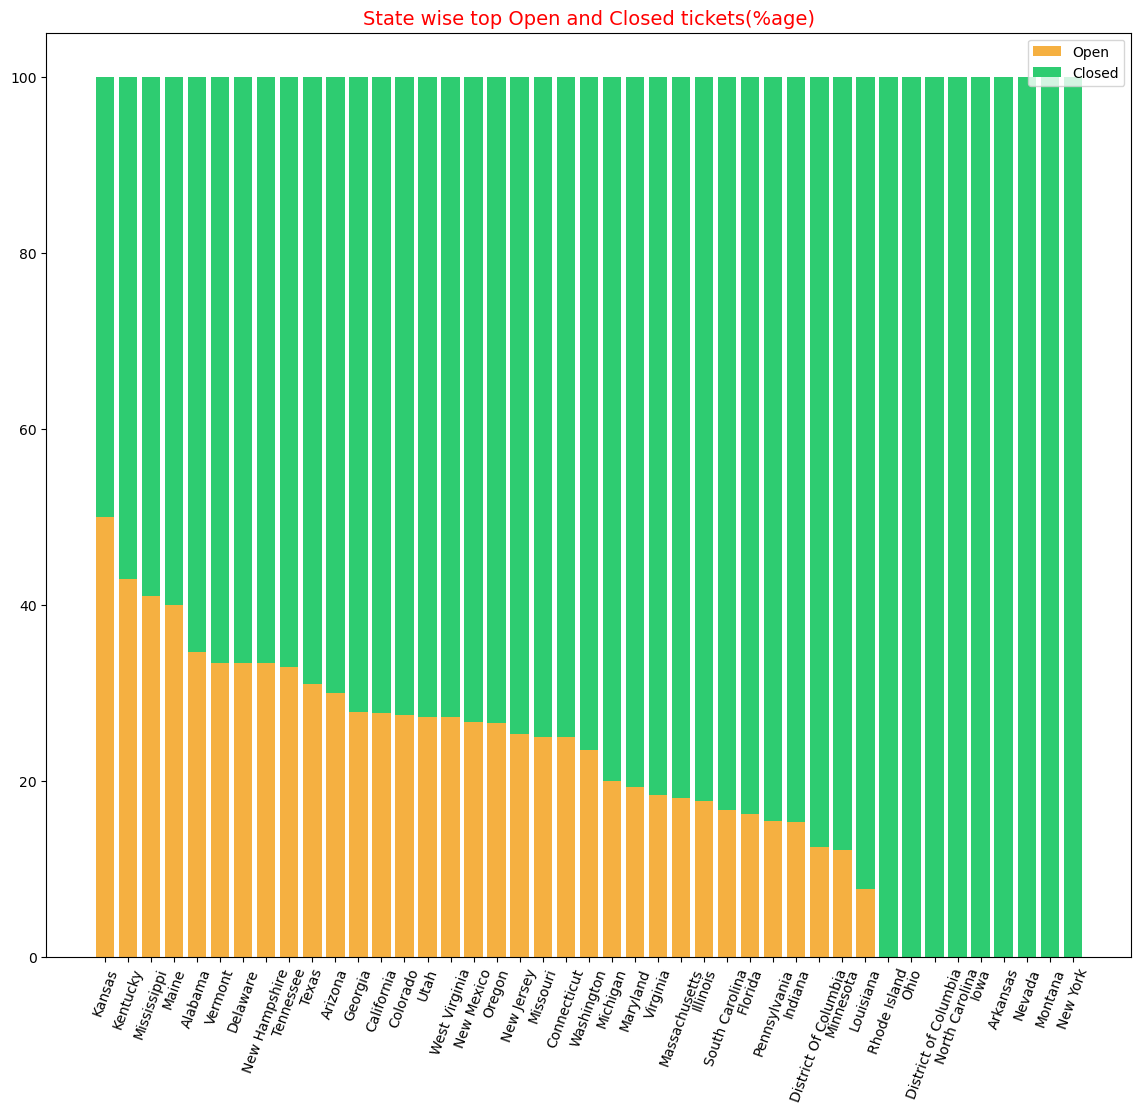

In [75]:
plt.figure(figsize=(14,12))
plt.bar(State_wise_status['State'],State_wise_status["Open Percentage"],color='#F5B041')
plt.bar(State_wise_status['State'],State_wise_status["Closed Percentage"],bottom=State_wise_status["Open Percentage"],color='#2ECC71')
plt.legend(['Open','Closed'])
plt.title('State wise top Open and Closed tickets(%age)',fontsize=14,color="Red")
plt.xticks(rotation=70)
plt.show()